In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [49]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

In [50]:
df = pd.read_csv('./datasource/BaHaMut_9.csv')
df

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度,觀看數(萬)
0,叫我對大哥 (TV版),217000,18083,2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0,1.8
1,汪汪與喵喵,66000,2750,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0,0.3
2,鬼滅之刃 刀匠村篇,5488000,498909,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,3,49.9
3,IDOLiSH7 - 偶像星願 - Third BEAT！,560000,18667,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0,1.9
4,薄櫻鬼 新OVA,49000,16333,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,1034000,79539,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0,8.0
434,女神宿舍的管理員。 年齡限制版,1127000,112700,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,1,11.3
435,彼得・格里爾的賢者時間 年齡限制版,1339000,111583,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,1,11.2
436,壽司大相撲,233000,4481,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0,0.4


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   動畫名     438 non-null    object 
 1   總觀看數    438 non-null    int64  
 2   平均觀看數   438 non-null    int64  
 3   年份      438 non-null    int64  
 4   月份      438 non-null    object 
 5   集數      438 non-null    int64  
 6   星級      438 non-null    float64
 7   評分人數    438 non-null    int64  
 8   導演監督    436 non-null    object 
 9   製作廠商    438 non-null    object 
 10  作品分類1   438 non-null    object 
 11  作品分類2   434 non-null    object 
 12  作品分類3   316 non-null    object 
 13  作品分類4   142 non-null    object 
 14  作品分類5   44 non-null     object 
 15  作品分類6   5 non-null      object 
 16  原作載體    438 non-null    object 
 17  新續作     438 non-null    object 
 18  人氣度     438 non-null    int64  
 19  觀看數(萬)  438 non-null    float64
dtypes: float64(2), int64(6), object(12)
memory usage: 68.6+ KB


In [53]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']] = arr
featuresCorr = df_corr[['集數', '星級', '評分人數',	'觀看數(萬)', '人氣度']].corr()
featuresCorr

C:\Users\User\AppData\Local\Temp\ipykernel_4208\930612099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']] = arr


,集數,星級,評分人數,觀看數(萬),人氣度
集數,1.000000,-0.024099,0.020247,-0.016369,-0.042899
星級,-0.024099,1.000000,0.276898,0.262252,0.246859
評分人數,0.020247,0.276898,1.000000,0.813731,0.771499
觀看數(萬),-0.016369,0.262252,0.813731,1.000000,0.907160
人氣度,-0.042899,0.246859,0.771499,0.907160,1.000000


<Axes: xlabel='星級', ylabel='觀看數(萬)'>

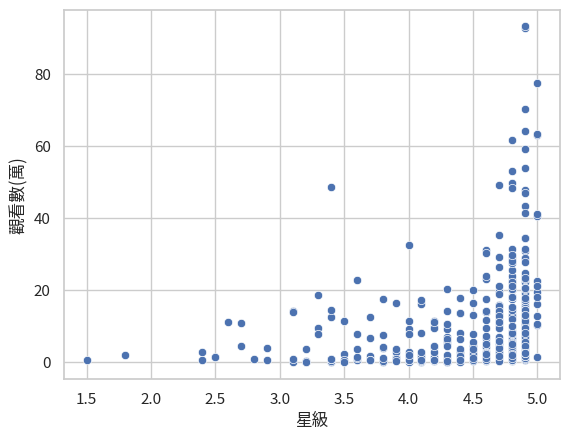

In [54]:
sns.scatterplot(data=df[['星級', '觀看數(萬)']], x="星級", y="觀看數(萬)")

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 觀看數(萬), dtype: float64

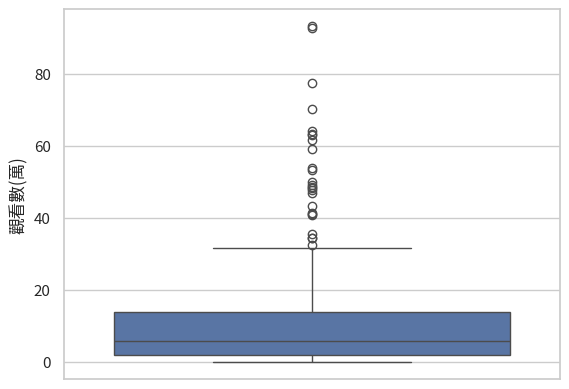

In [65]:
sns.boxplot(data=df['觀看數(萬)'])
df['觀看數(萬)'].describe()

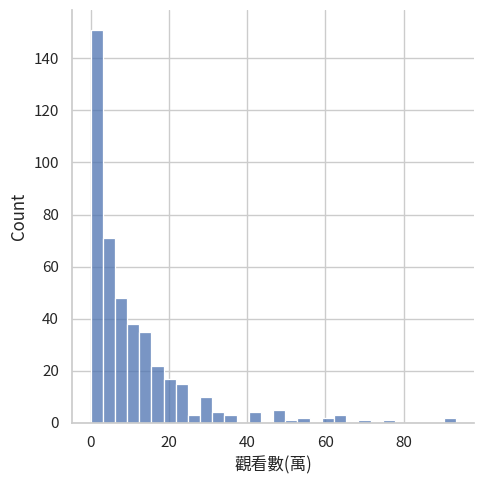

In [66]:
sns.displot(data=df, x='觀看數(萬)')

In [67]:
df1 = df[df['觀看數(萬)'] >= 14].sort_values('觀看數(萬)')
df1['平均觀看數(萬)'] = df1['觀看數(萬)']
df1 = df1.drop('平均觀看數', axis=1)
df1 = df1.drop('觀看數(萬)', axis=1)
df1 = df1.drop('人氣度', axis=1)
df1['總觀看數'] = round(df1['總觀看數'] / 10000, ndigits=1)
df1['總觀看數(萬)'] = df1['總觀看數']
df1 = df1.drop('總觀看數', axis=1)
df1

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
396,進化果實～不知不覺踏上勝利的人生～,2021,秋番,12,3.1,6900,奥村よしあき,HOTLINE,冒險,奇幻,異世界,NaN,NaN,NaN,小說改編,新作,14.0,168.0
132,異世界魔王與召喚少女的奴隸魔術 Ω,2021,春番,10,4.6,2400,桑原智,手塚製作公司、Okuruto Noboru,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作,14.0,140.5
406,世界盡頭的聖騎士,2021,秋番,12,4.3,4300,信田ユウ,Children's Playground Entertainment,冒險,奇幻,魔法,NaN,NaN,NaN,小說改編,續作,14.2,170.0
362,無能力者娜娜,2020,夏番,13,4.7,3800,石平信司,Bridge,超能力,校園,推理,懸疑,黑暗,NaN,漫畫改編,新作,14.2,184.3
357,女朋友 and 女朋友,2021,夏番,12,4.6,5100,桑原智,手塚Production,校園,戀愛,NaN,NaN,NaN,NaN,漫畫改編,續作,14.3,171.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,【我推的孩子】,2023,春番,11,4.9,52600,平牧大輔,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作,64.2,706.5
68,SPY×FAMILY 間諜家家酒,2022,春番,25,4.9,52700,古橋一浩,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作,70.4,1760.3
303,輝夜姬想讓人告白～天才們的戀愛頭腦戰～ 第二季,2020,春番,12,5.0,20200,畠山守,A-1 Pictures,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作,77.6,930.6
99,鬼滅之刃 遊郭篇,2021,秋番,11,4.9,18000,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,92.8,1021.2


In [ ]:
df1.to_csv('./datasource/Top110_Animes.csv', index=False)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 396 to 426
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       110 non-null    object 
 1   年份        110 non-null    int64  
 2   月份        110 non-null    object 
 3   集數        110 non-null    int64  
 4   星級        110 non-null    float64
 5   評分人數      110 non-null    int64  
 6   導演監督      110 non-null    object 
 7   製作廠商      110 non-null    object 
 8   作品分類1     110 non-null    object 
 9   作品分類2     110 non-null    object 
 10  作品分類3     95 non-null     object 
 11  作品分類4     54 non-null     object 
 12  作品分類5     24 non-null     object 
 13  作品分類6     3 non-null      object 
 14  原作載體      110 non-null    object 
 15  新續作       110 non-null    object 
 16  平均觀看數(萬)  110 non-null    float64
 17  總觀看數(萬)   110 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 16.3+ KB


<Axes: ylabel='觀看數(萬)'>

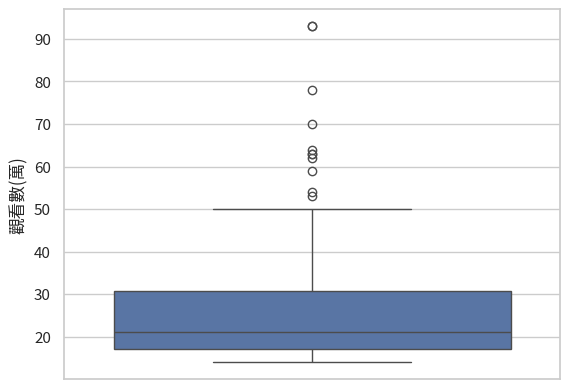

In [46]:
sns.boxplot(data=df1['觀看數(萬)'])


In [12]:
df1['製作廠商'].value_counts()

製作廠商
A-1 Pictures                           8
J.C.STAFF                              6
SILVER LINK.                           6
MAPPA                                  5
CloverWorks                            4
8bit                                   4
BONES                                  4
ufotable                               3
C2C                                    3
project No.9                           3
EMT Squared                            3
Lerche                                 3
動画工房                                   3
diomedéa                               3
LIDENFILMS                             2
MADHOUSE                               2
Millepensee                            2
feel.                                  2
Production I.G                         2
MAHO FILM                              2
Nexus                                  2
Passione                               2
WIT STUDIO                             2
TMS Entertainment                      2
Kinema Citr

In [13]:
AllTagDict = {
    '漫畫改編': 206,
    '小說改編': 103,
    '原創作品': 86,
    '遊戲改編': 43,
    '新作': 272,
    '續作': 166,
    '奇幻': 145,
    '冒險': 129,
    '校園': 105,
    '喜劇': 102,
    '動作': 95,
    '戀愛': 71,
    '青春': 59,
    '異世界': 53,
    '科幻': 52,
    '魔法': 48,
    '溫馨': 43,
    '勵志': 37,
    '競技': 34,
    '音樂': 34,
    '靈異神怪': 32,
    '闔家觀賞': 30,
    '運動': 29,
    '泡麵番': 28,
    '超能力': 27,
    '懸疑': 24,
    '偶像': 23,
    '職場': 22,
    '血腥暴力': 21,
    '悠閒': 19,
    '推理': 17,
    '機甲': 15,
    '戰爭': 14,
    '黑暗': 14,
    '親情': 12,
    '料理': 8,
    '歷史': 11,
    '18禁': 8,
    '感人': 5,
    '時間穿越': 5,
    'BL': 4,
    'GL': 2,
    '特攝': 2,
}

In [37]:
PopularTagDict = {
    '漫畫改編': 48,
    '小說改編': 58,
    '原創作品': 7,
    '遊戲改編': 1,
    '新作': 60,
    '續作': 54,
    '奇幻': 62,
    '冒險': 51,
    '校園': 33,
    '喜劇': 29,
    '動作': 39,
    '戀愛': 22,
    '青春': 7,
    '異世界': 32,
    '科幻': 9,
    '魔法': 28,
    '溫馨': 4,
    '勵志': 12,
    '競技': 2,
    '音樂': 3,
    '靈異神怪': 8,
    '闔家觀賞': 0,
    '運動': 4,
    '泡麵番': 0,
    '超能力': 13,
    '懸疑': 8,
    '偶像': 2,
    '職場': 1,
    '血腥暴力': 11,
    '悠閒': 1,
    '推理': 5,
    '機甲': 2,
    '戰爭': 4,
    '黑暗': 5,
    '親情': 2,
    '料理': 2,
    '歷史': 0,
    '18禁': 1,
    '感人': 1,
    '時間穿越': 3,
    'BL': 0,
    'GL': 1,
    '特攝': 0
}

In [39]:
for item in PopularTagDict.keys():
    if PopularTagDict.get(item) == 0:
        print(item)

闔家觀賞
泡麵番
歷史
BL
特攝


In [31]:
df2 = df1[['作品分類1', '作品分類2', '作品分類3', '作品分類4',
           '作品分類5', '作品分類6', '原作載體', '新續作']]
df2
count_list = []
for i in range(114):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)

In [33]:
for item in set(count_list):
    print(item, count_list.count(item))

青春 7
GL 1
18禁 1
小說改編 58
續作 54
黑暗 5
靈異神怪 8
時間穿越 3
遊戲改編 1
新作 60
悠閒 1
競技 2
懸疑 8
推理 5
音樂 3
漫畫改編 48
職場 1
親情 2
戰爭 4
科幻 9
料理 2
魔法 28
動作 39
溫馨 4
冒險 51
機甲 2
奇幻 62
超能力 13
勵志 12
偶像 2
異世界 32
喜劇 29
原創作品 7
血腥暴力 11
戀愛 22
運動 4
校園 33
感人 1
